# Import Library

In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

# Seed and Mount Drive

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Raw Dataset

In [ ]:
DATASET_DIR = '/content/drive/MyDrive/Kuliah/Semester 6/Deep Learning/Proyek Final DL/Baru/Dataset/'

In [ ]:
fileName = DATASET_DIR + '/data_train/raw'
fileObject = open(fileName, 'rb')
train_data = pickle.load(fileObject)
fileObject.close()

fileName = DATASET_DIR + '/data_test_seen/raw'
fileObject = open(fileName, 'rb')
seen_test_data = pickle.load(fileObject)
fileObject.close()

fileName = DATASET_DIR + '/data_test_unseen/raw'
fileObject = open(fileName, 'rb')
unseen_test_data = pickle.load(fileObject)
fileObject.close()

In [ ]:
for data in train_data:
  print(len(data),end=' ')
print('')
for data in seen_test_data:
  print(len(data),end=' ')
print('')
for data in unseen_test_data:
  print(len(data),end=' ')
print('')

60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 
12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 
15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 


# Plot Dataset

In [ ]:
def plot_any(data, title, rows, cols):
  fig=plt.figure(figsize=(3*cols, 3*rows))

  for i in range(1, cols*rows+1):
    ax = fig.add_subplot(rows, cols, i)
    ax.title.set_text(title)
    plt.imshow(data[i-1])
    plt.xticks([]), plt.yticks([])
  plt.show()  

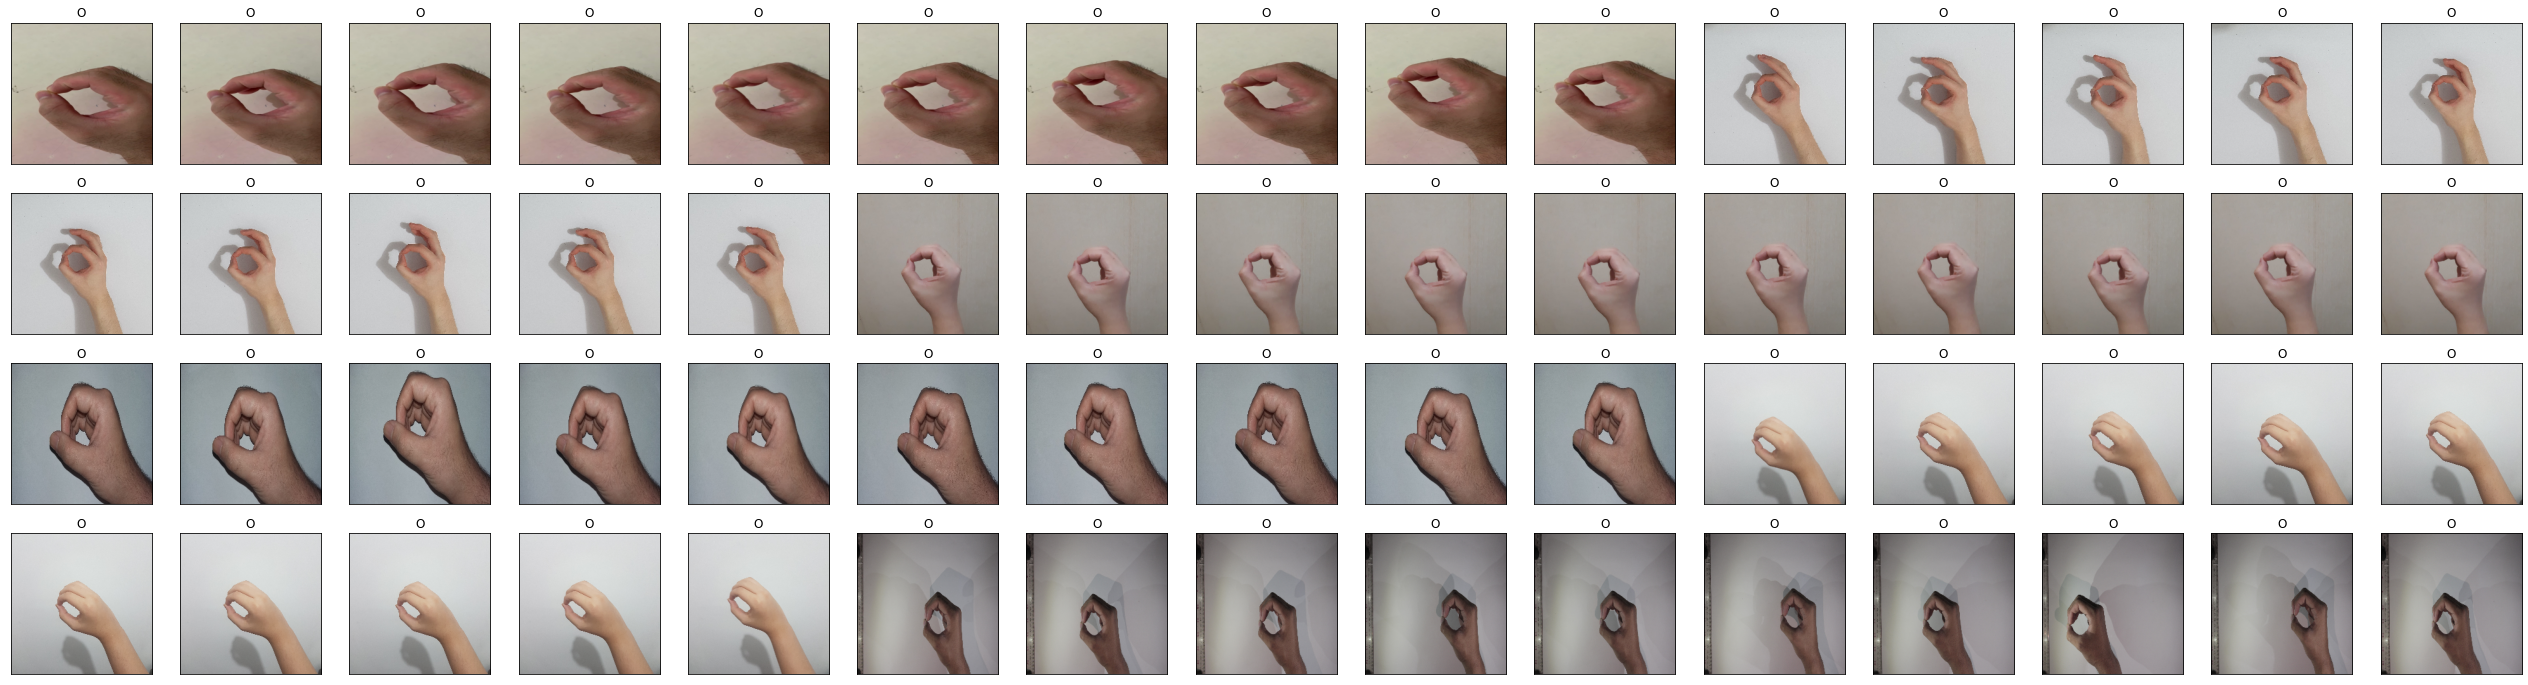

In [ ]:
index = ord('O')-64
plot_any(train_data[index], chr(64+index), 4, 15)

# Grayscale

In [ ]:
def convert_to_grayscale(raw):
  gray = cv2.cvtColor(raw, cv2.COLOR_RGB2GRAY)
  gray = np.dstack((gray, gray, gray))
  return gray

In [ ]:
train_data_grayscale = []
for i in range(27):
  data = []
  for j in range(60):
    data.append(convert_to_grayscale(train_data[i][j]))
  train_data_grayscale.append(data)

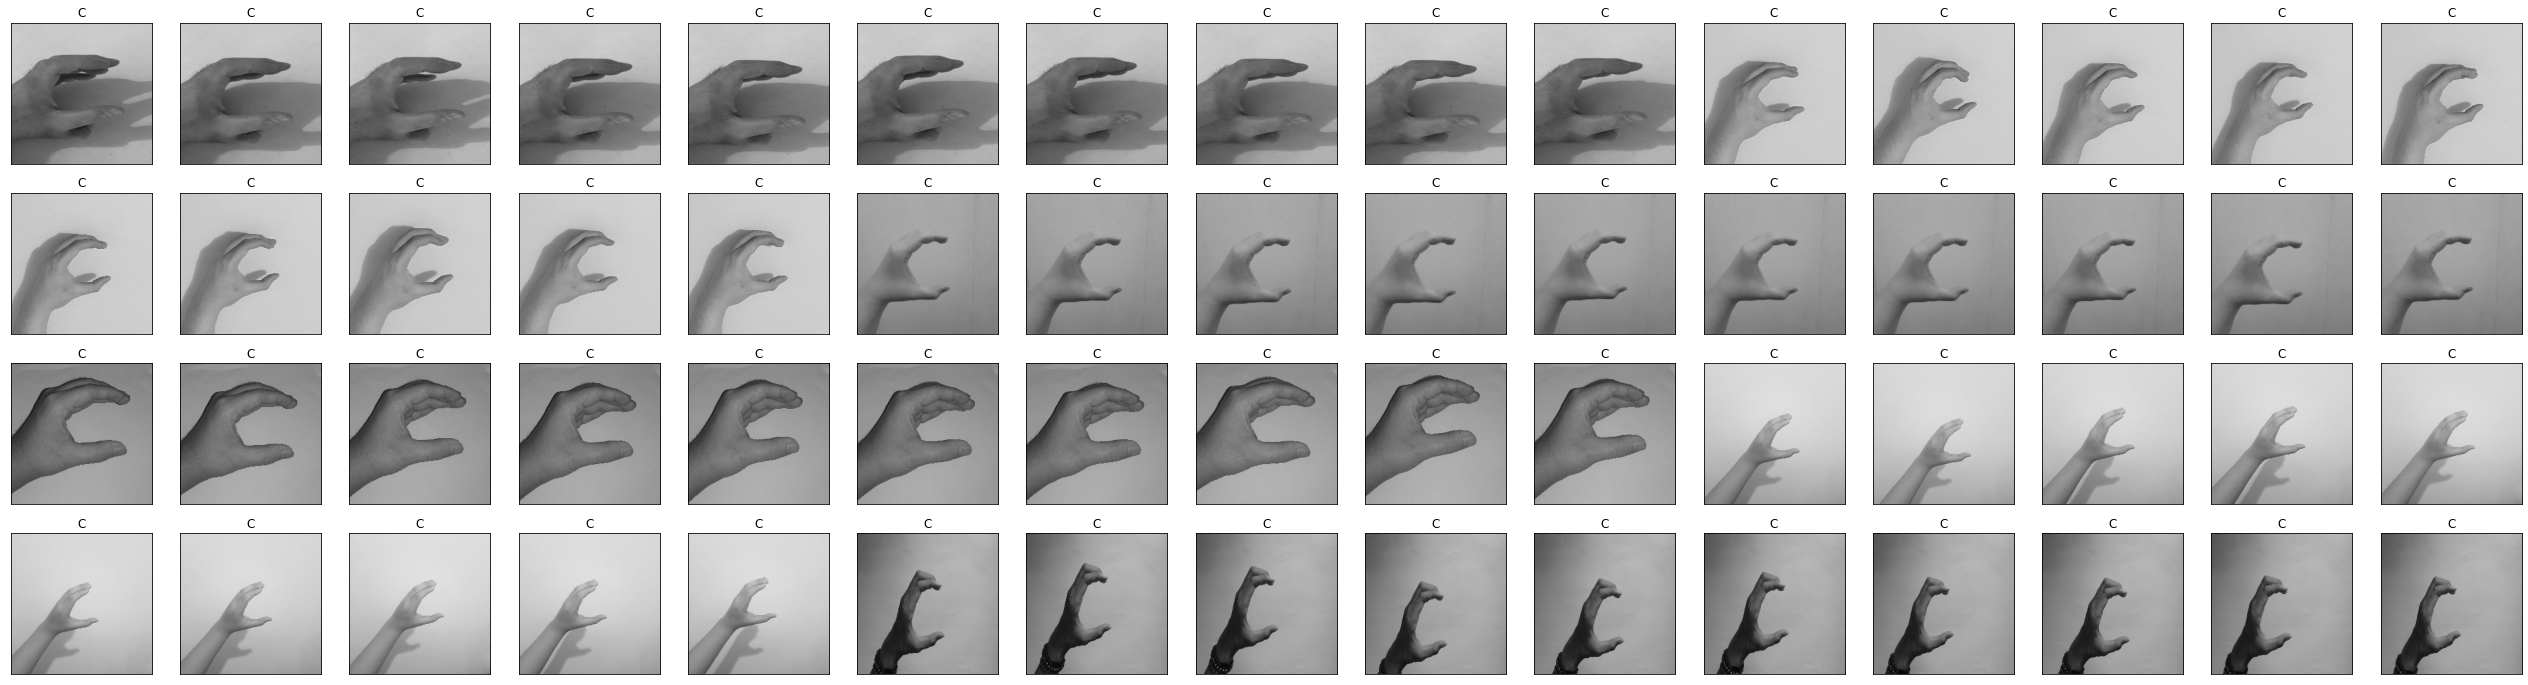

In [ ]:
index = random.randint(0, 26)
plot_any(train_data_grayscale[index], chr(64+index), 4, 15)

In [ ]:
seen_test_data_grayscale = []
for i in range(27):
  data = []
  for j in range(12):
    data.append(convert_to_grayscale(seen_test_data[i][j]))
  seen_test_data_grayscale.append(data)

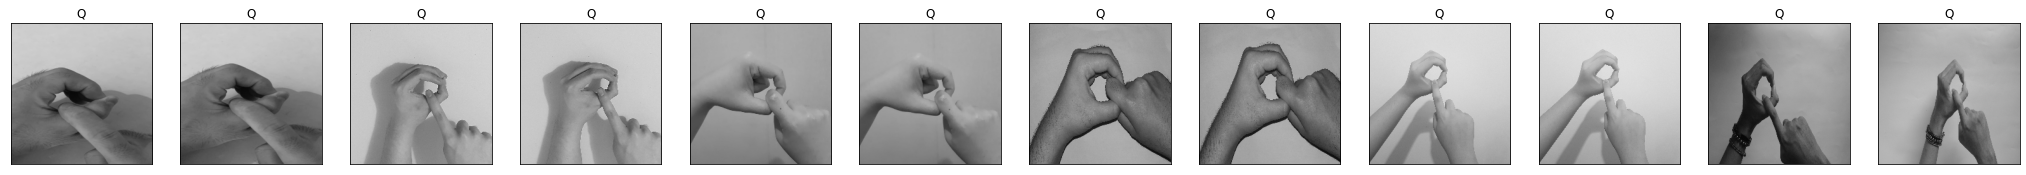

In [ ]:
index = random.randint(0, 26)
plot_any(seen_test_data_grayscale[index], chr(64+index), 1, 12)

In [ ]:
unseen_test_data_grayscale = []
for i in range(27):
  data = []
  for j in range(15):
    data.append(convert_to_grayscale(unseen_test_data[i][j]))
  unseen_test_data_grayscale.append(data)

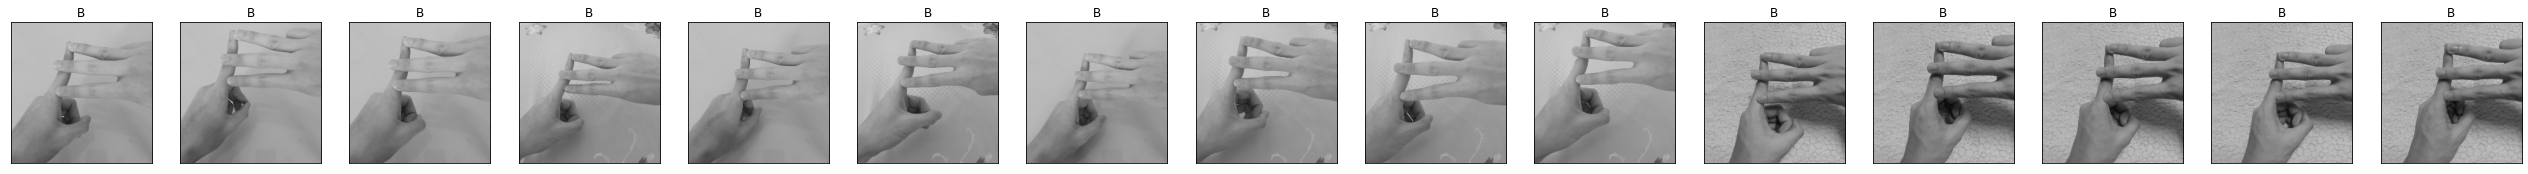

In [ ]:
index = random.randint(0, 26)
plot_any(unseen_test_data_grayscale[index], chr(64+index), 1, 15)

In [ ]:
fileName = DATASET_DIR + 'data_train/grayscale'
fileObject = open(fileName, 'wb')
pickle.dump(train_data_grayscale, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_seen/grayscale'
fileObject = open(fileName, 'wb')
pickle.dump(seen_test_data_grayscale, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_unseen/grayscale'
fileObject = open(fileName, 'wb')
pickle.dump(unseen_test_data_grayscale, fileObject)
fileObject.close()

# Edge Detection

In [ ]:
def convert_to_edge(raw):
  edge = cv2.cvtColor(raw, cv2.COLOR_RGB2GRAY)
  edge = cv2.Canny(edge, 50, 50)
  edge = np.dstack((edge, edge, edge))
  return edge

In [ ]:
train_data_edge = []
for i in range(27):
  data = []
  for j in range(60):
    data.append(convert_to_edge(train_data[i][j]))
  train_data_edge.append(data)

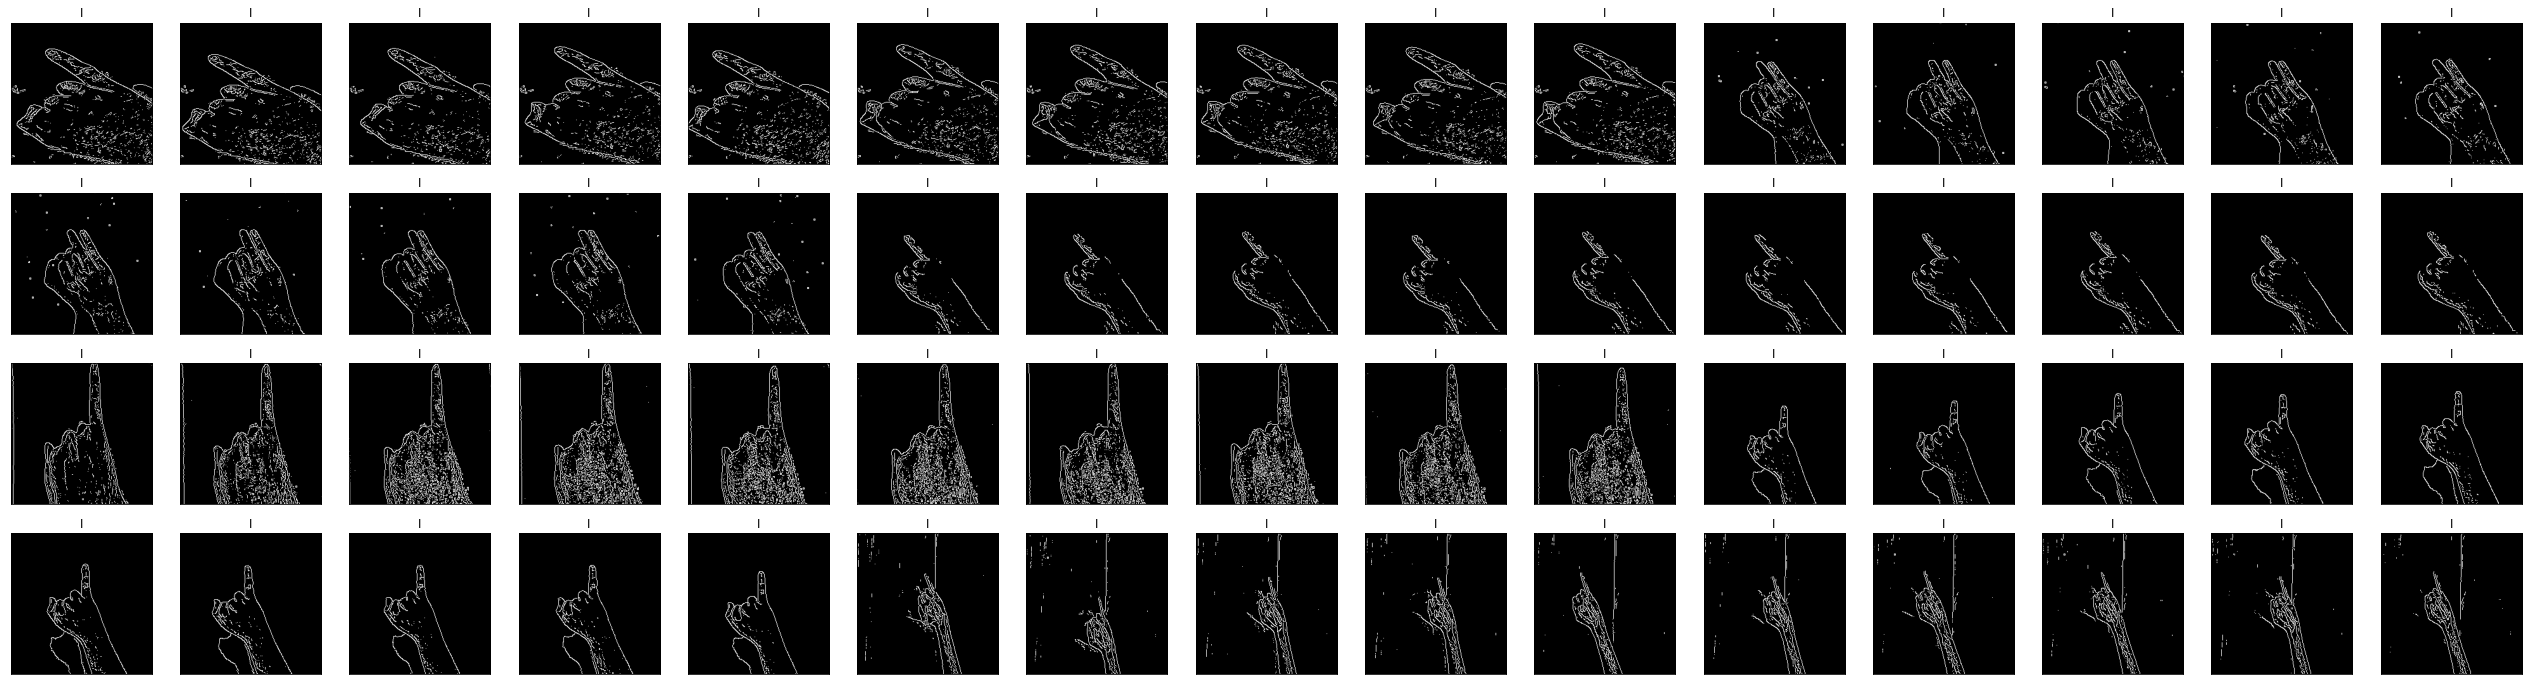

In [ ]:
index = random.randint(0, 26)
plot_any(train_data_edge[index], chr(64+index), 4, 15)

In [ ]:
seen_test_data_edge = []
for i in range(27):
  data = []
  for j in range(12):
    data.append(convert_to_edge(seen_test_data[i][j]))
  seen_test_data_edge.append(data)

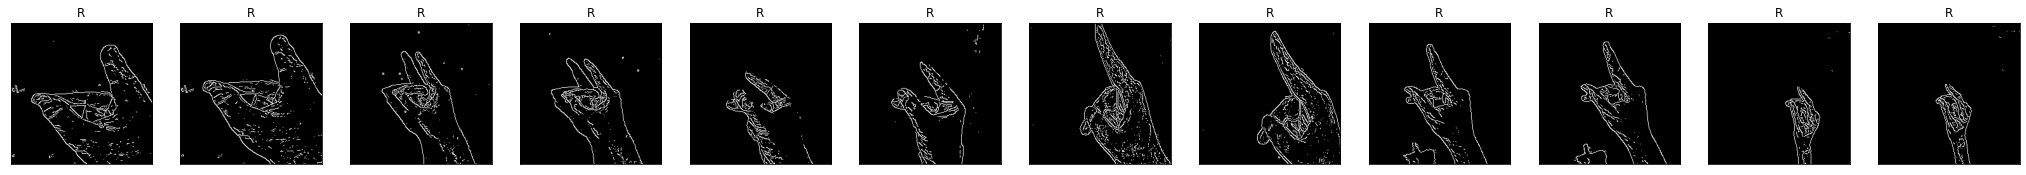

In [ ]:
index = random.randint(0, 26)
plot_any(seen_test_data_edge[index], chr(64+index), 1, 12)

In [ ]:
unseen_test_data_edge = []
for i in range(27):
  data = []
  for j in range(15):
    data.append(convert_to_edge(unseen_test_data[i][j]))
  unseen_test_data_edge.append(data)

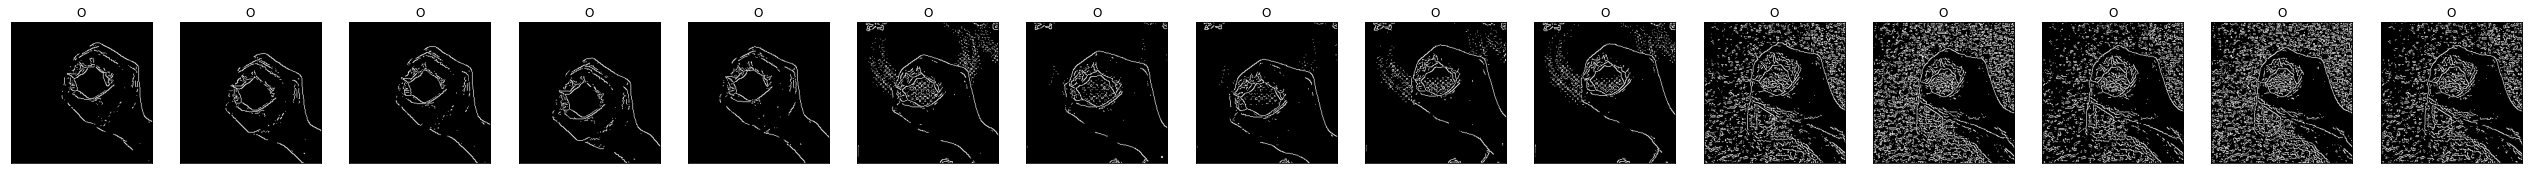

In [ ]:
index = random.randint(0, 26)
plot_any(unseen_test_data_edge[index], chr(64+index), 1, 15)

In [ ]:
fileName = DATASET_DIR + 'data_train/edge'
fileObject = open(fileName, 'wb')
pickle.dump(train_data_edge, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_seen/edge'
fileObject = open(fileName, 'wb')
pickle.dump(seen_test_data_edge, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_unseen/edge'
fileObject = open(fileName, 'wb')
pickle.dump(unseen_test_data_edge, fileObject)
fileObject.close()

# Segmentation

In [ ]:
def convert_to_segment(raw):
  segment = cv2.cvtColor(raw, cv2.COLOR_RGB2GRAY)
  _, segment = cv2.threshold(segment, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  segment = np.dstack((segment, segment, segment))
  return segment

In [ ]:
train_data_segment = []
for i in range(27):
  data = []
  for j in range(60):
    data.append(convert_to_segment(train_data[i][j]))
  train_data_segment.append(data)

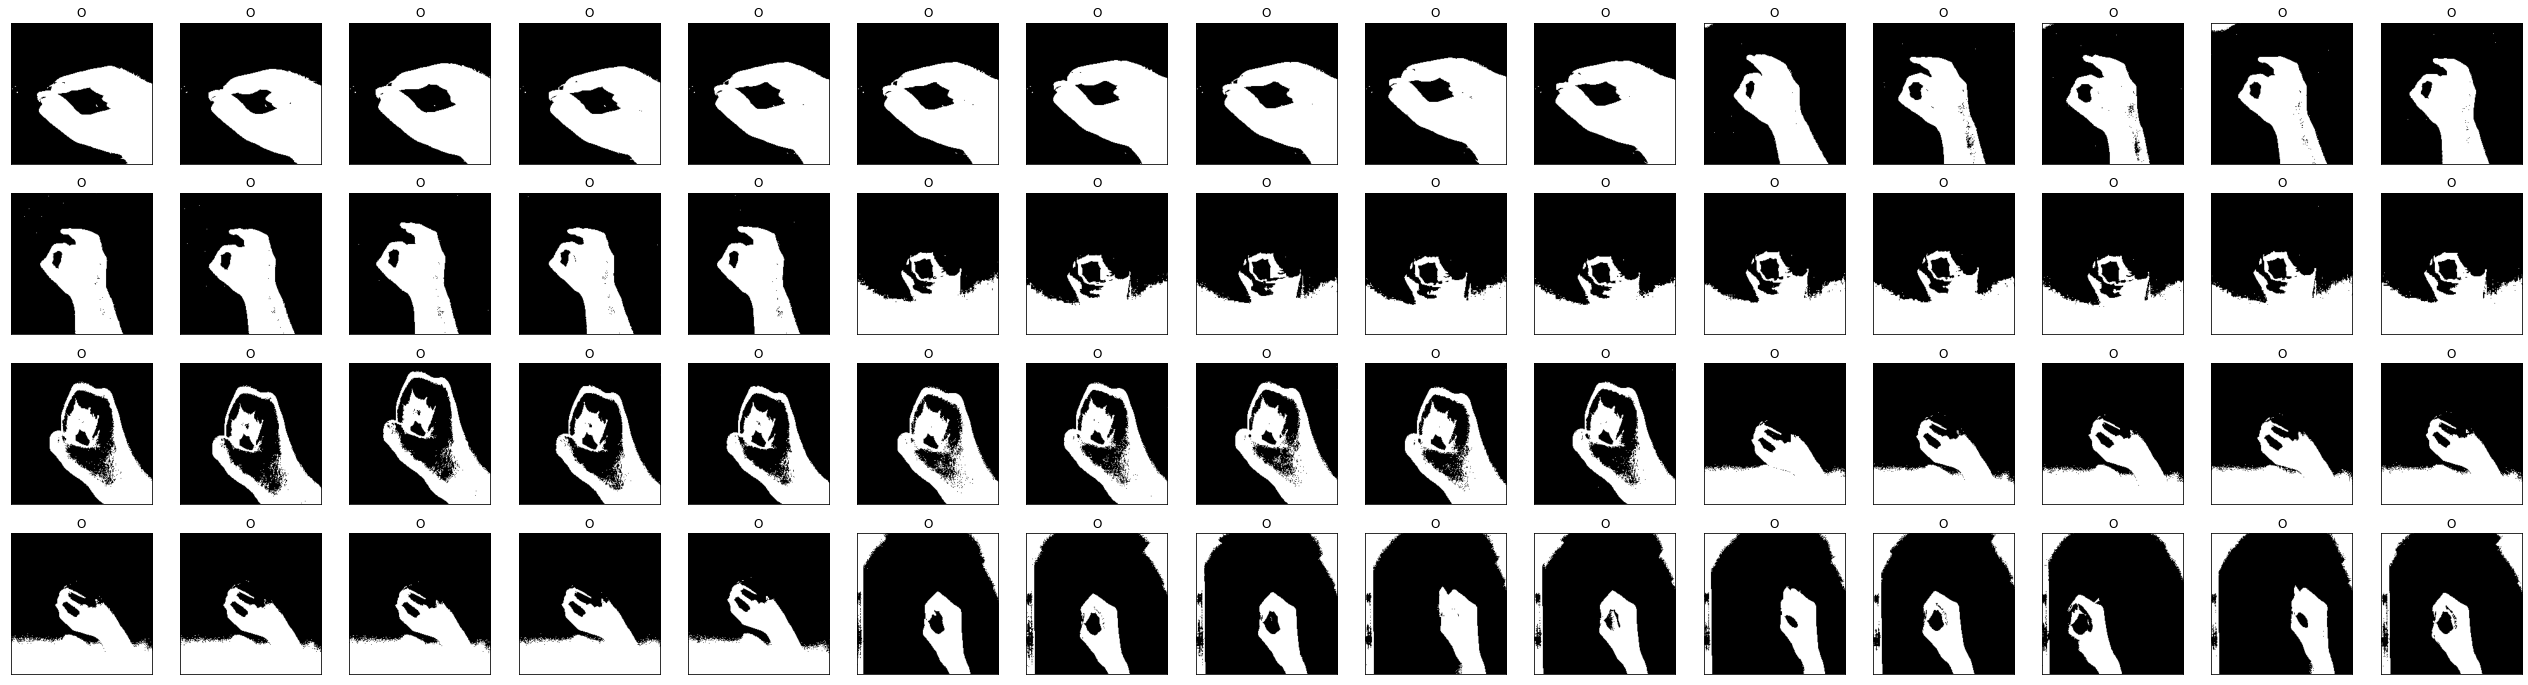

In [ ]:
index = random.randint(0, 26)
plot_any(train_data_segment[index], chr(64+index), 4, 15)

In [ ]:
seen_test_data_segment = []
for i in range(27):
  data = []
  for j in range(12):
    data.append(convert_to_segment(seen_test_data[i][j]))
  seen_test_data_segment.append(data)

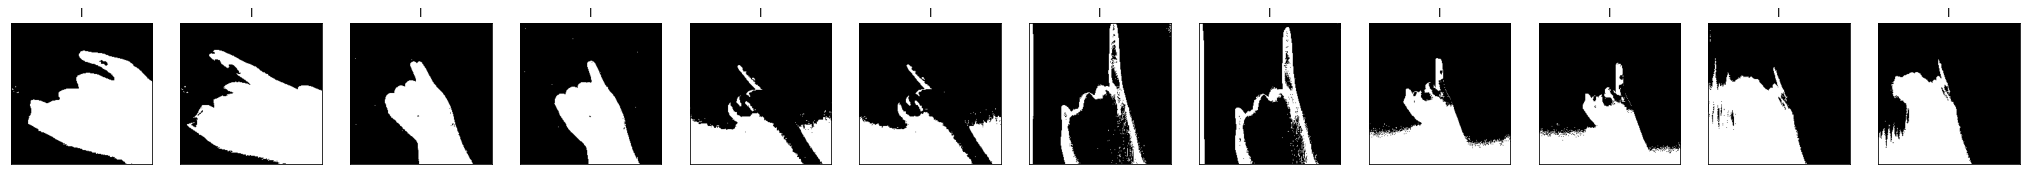

In [ ]:
index = random.randint(0, 26)
plot_any(seen_test_data_segment[index], chr(64+index), 1, 12)

In [ ]:
unseen_test_data_segment = []
for i in range(27):
  data = []
  for j in range(15):
    data.append(convert_to_segment(unseen_test_data[i][j]))
  unseen_test_data_segment.append(data)

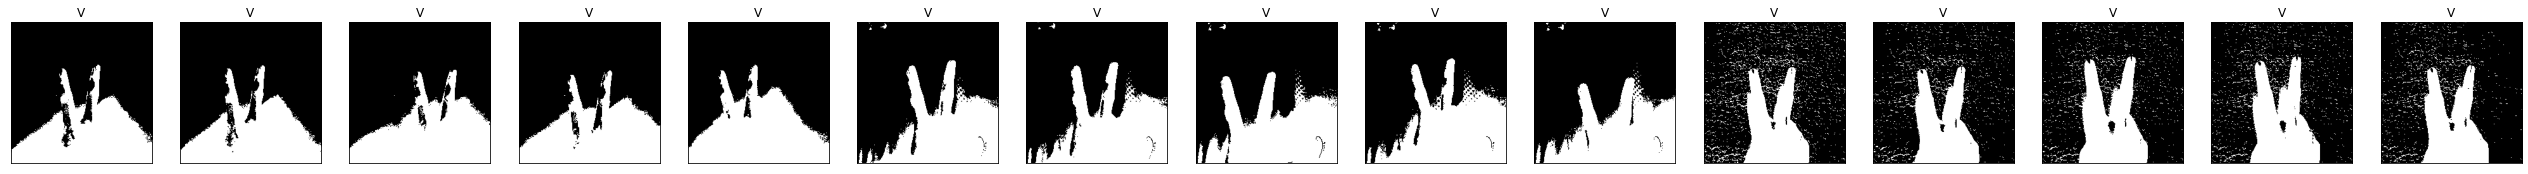

In [ ]:
index = random.randint(0, 26)
plot_any(unseen_test_data_segment[index], chr(64+index), 1, 15)

In [ ]:
fileName = DATASET_DIR + 'data_train/segment'
fileObject = open(fileName, 'wb')
pickle.dump(train_data_segment, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_seen/segment'
fileObject = open(fileName, 'wb')
pickle.dump(seen_test_data_segment, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_unseen/segment'
fileObject = open(fileName, 'wb')
pickle.dump(unseen_test_data_segment, fileObject)
fileObject.close()

# Sharpening

In [ ]:
filterSize = 5
filter = []
for i in range(int(filterSize/2)):
  filter.append([-1]*filterSize)
filter.append([-1]*int(filterSize/2)+[filterSize**2]+[-1]*int(filterSize/2))
for i in range(int(filterSize/2)):
  filter.append([-1]*filterSize)

In [ ]:
filter

[[-1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1],
 [-1, -1, 25, -1, -1],
 [-1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1]]

In [ ]:
def convert_to_sharp(raw, filter):
  sharp = cv2.filter2D(raw, -1, np.array(filter))
  return sharp

In [ ]:
train_data_sharp = []
for i in range(27):
  data = []
  for j in range(60):
    data.append(convert_to_sharp(train_data[i][j], filter))
  train_data_sharp.append(data)

In [ ]:
index = random.randint(0, 26)
plot_any(train_data_sharp[index], chr(64+index), 4, 15)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
seen_test_data_sharp = []
for i in range(27):
  data = []
  for j in range(12):
    data.append(convert_to_sharp(seen_test_data[i][j], filter))
  seen_test_data_sharp.append(data)

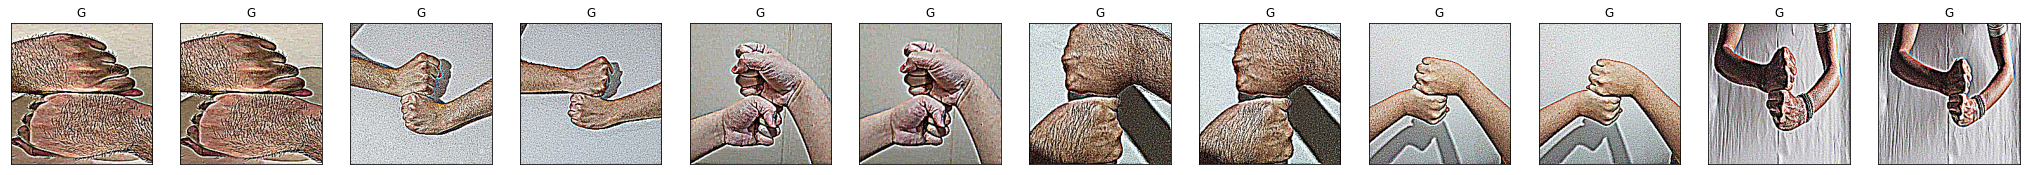

In [ ]:
index = random.randint(0, 26)
plot_any(seen_test_data_sharp[index], chr(64+index), 1, 12)

In [ ]:
unseen_test_data_sharp = []
for i in range(27):
  data = []
  for j in range(15):
    data.append(convert_to_sharp(unseen_test_data[i][j], filter))
  unseen_test_data_sharp.append(data)

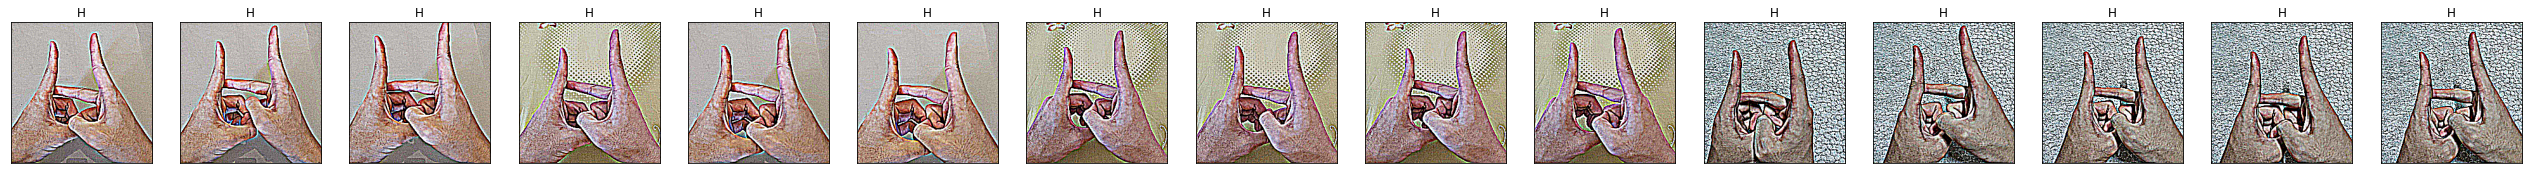

In [ ]:
index = random.randint(0, 26)
plot_any(unseen_test_data_sharp[index], chr(64+index), 1, 15)

In [ ]:
fileName = DATASET_DIR + 'data_train/sharp'
fileObject = open(fileName, 'wb')
pickle.dump(train_data_sharp, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_seen/sharp'
fileObject = open(fileName, 'wb')
pickle.dump(seen_test_data_sharp, fileObject)
fileObject.close()

fileName = DATASET_DIR + 'data_test_unseen/sharp'
fileObject = open(fileName, 'wb')
pickle.dump(unseen_test_data_sharp, fileObject)
fileObject.close()